In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import os

In [2]:
cust = pd.read_csv("Telco_Churn.csv")
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [71]:
cust['TotalCharges'] = pd.to_numeric(cust['TotalCharges'], errors='coerce')

In [4]:
cust.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df = cust.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [156]:
df2 = cust.iloc[:,1:]
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No', value=0, inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [157]:
df_dummies = pd.get_dummies(df2)
df_dummies


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [164]:
df_dummies.isnull().sum()
df_dummies.dropna(inplace=True)

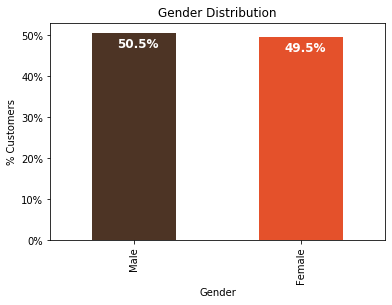

In [20]:
colors = ['#4D3425','#E4512B']
ax = (cust['gender'].value_counts()*100 / len(cust)).plot(kind='bar', color=colors, stacked=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

totals=[]

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, str(round((i.get_height()/total),1)) + "%", 
            fontsize=12, color='white',weight='bold')

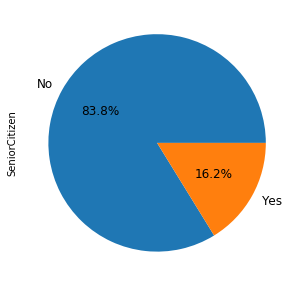

In [22]:
ax = (cust['SeniorCitizen'].value_counts() * 100/len(cust)).plot.pie(autopct='%.1f%%', labels=['No', 'Yes'],
                                                                    figsize=(5,5), fontsize=12)

In [25]:
partner_dependents = cust.groupby(['Partner','Dependents']).size().unstack()
partner_dependents

Dependents,No,Yes
Partner,,
No,3280,361
Yes,1653,1749


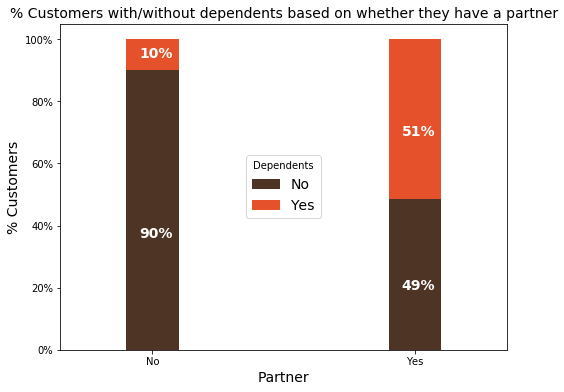

In [29]:
ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,
                                                                      rot = 0, figsize = (8,6), color = colors)
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)                                                                
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white', weight = 'bold', size=14)
                                                                               
                                                               

Text(0.5, 1.0, '# of Customers by their tenure')

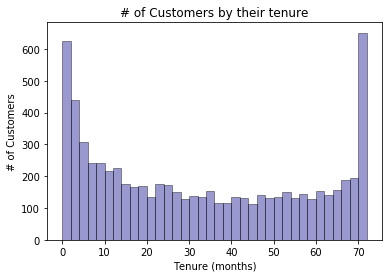

In [31]:
ax = sns.distplot(cust['tenure'], hist=True, kde=False, bins=int(180/5), color = 'darkblue', 
                  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

In [57]:
contract = (cust.groupby('Contract').size()/ len(cust))*100
contract

Contract
Month-to-month    55.019168
One year          20.914383
Two year          24.066449
dtype: float64

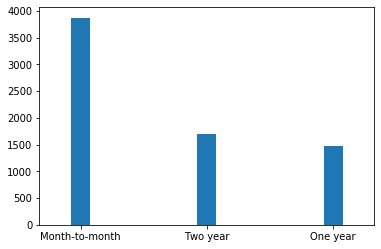

In [60]:

ax = cust['Contract'].value_counts().plot(kind='bar', rot=0, width=0.15)


TypeError: distplot() got multiple values for argument 'bins'

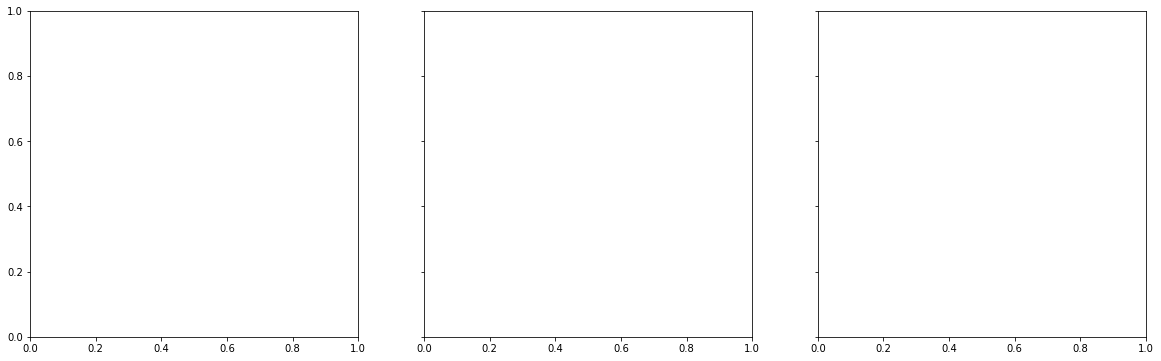

In [65]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))
ax = sns.distplot(cust[cust['Contract'] == 'Month-to-month'], ['tenure'], hist=True, kde=False, bins=int(180/5),
                 color = 'turquoise', hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth': 4}, ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(cust[cust['Contract']=='One year']['tenure'],hist=True,  kde=False, bins=int(180/5),
                  color = 'steelblue', hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)


ax = sns.distplot(cust[cust['Contract']=='Two year']['tenure'],hist=True, kde=False, bins=int(180/5),
                  color = 'darkblue', hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4}, ax=ax3)

ax.set_xlabel('Tenure (months)')

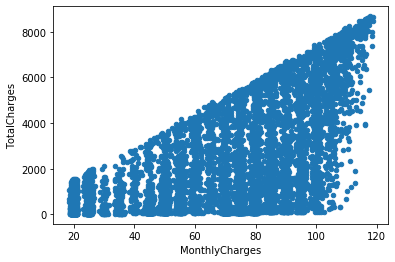

In [72]:
cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')

In [80]:
churn = cust.groupby('Churn').size()
churn

Churn
No     5174
Yes    1869
dtype: int64

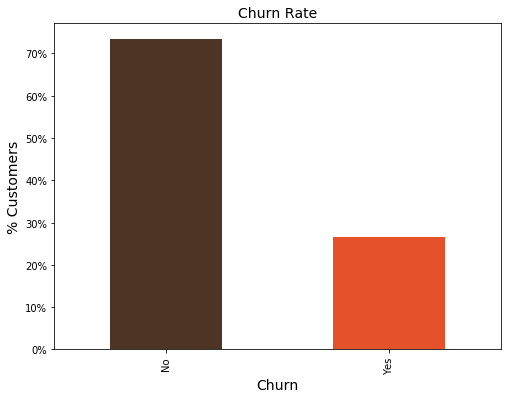

In [78]:
colors = ['#4D3425','#E4512B']
ax = (cust['Churn'].value_counts()*100 / len(cust)).plot(kind='bar', color=colors, stacked=True, figsize=(8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

# for i in ax.patches:
#     ax.text(i.get_x()+.15, i.get_height()-4.0, str(round((i.get_height()/total), 1))+'%',
#             fontsize=12, color='white', weight = 'bold', size = 14)

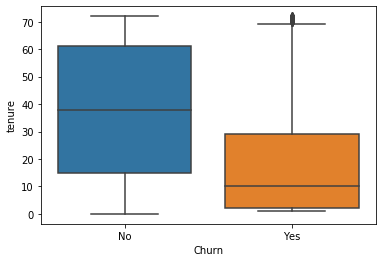

In [81]:
sns.boxplot(x=cust.Churn, y=cust.tenure)

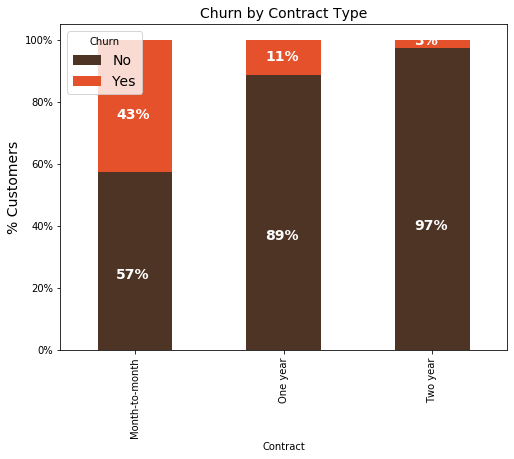

In [89]:
colors = ['#4D3425','#E4512B']
contract_churn = cust.groupby(['Contract', 'Churn']).size().unstack()
# contract_churn
ax = (contract_churn.T * 100 / contract_churn.T.sum()).T.plot(kind="bar", color=colors, stacked=True, figsize=(8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white',
               weight = 'bold', size = 14)

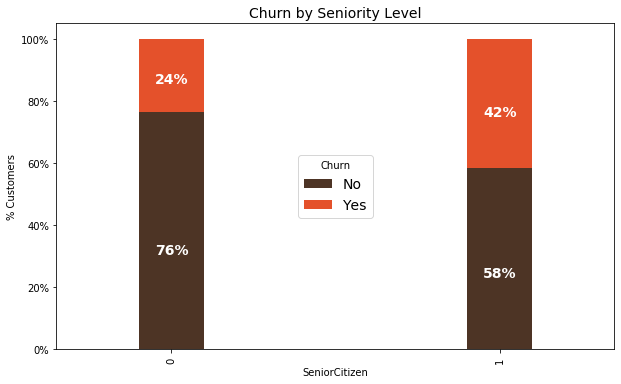

In [94]:
#  churn by seniority
colors = ['#4D3425','#E4512B']
senior_churn = cust.groupby(['SeniorCitizen', 'Churn']).size().unstack()

ax = (senior_churn.T*100 / senior_churn.T.sum()).T.plot(kind='bar', stacked=True, color=colors, figsize=(10,6), width=0.2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', 
                weight = 'bold',size =14)


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

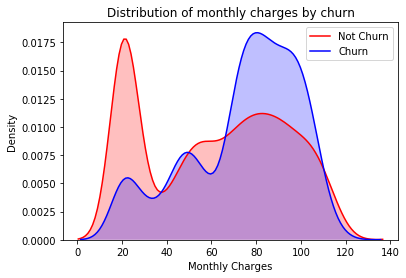

In [105]:
#  churn by monthly charges

ax = sns.kdeplot(cust.MonthlyCharges[(cust['Churn'] == 'No')],color='red', shade=True)
ax = sns.kdeplot(cust.MonthlyCharges[(cust['Churn'] == 'Yes')], color='blue', shade=True)
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Density')
ax.legend(['Not Churn', 'Churn'], loc='best')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of churn by Total charges')

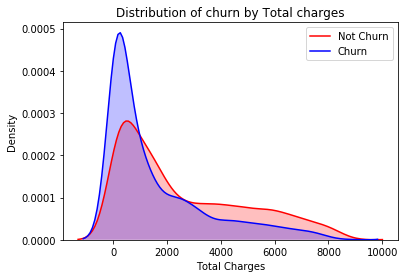

In [106]:
#  churn by total charges

ax = sns.kdeplot(cust.TotalCharges[(cust['Churn'] == 'No')], color ='red', shade=True)
ax = sns.kdeplot(cust.TotalCharges[(cust['Churn'] == 'Yes')], color='blue', shade = True)
ax.set_xlabel('Total Charges')
ax.set_ylabel('Density')
ax.legend(['Not Churn', 'Churn'], loc='best')
ax.set_title("Distribution of churn by Total charges")

In [165]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [166]:
#  Logistic Regression

X = df_dummies.drop(columns=['Churn'])
y = df_dummies['Churn'].values
# print(X)
# print(y)

# Scaling all the variables to a range of 0 and 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
# X



In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model = LogisticRegression()
result = model.fit(X_train, y_train)
predict = model.predict(X_test)


In [169]:
print(metrics.accuracy_score(y_test, predict))

0.8075829383886256


In [170]:
print(metrics.confusion_matrix(y_test, predict))

[[1418  162]
 [ 244  286]]


In [171]:
print(metrics.f1_score(y_test, predict))

0.5848670756646217


AxesSubplot(0.125,0.125;0.775x0.755)


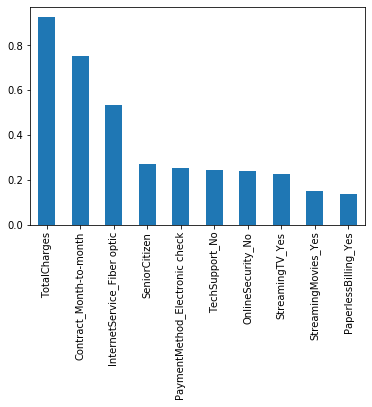

In [172]:
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


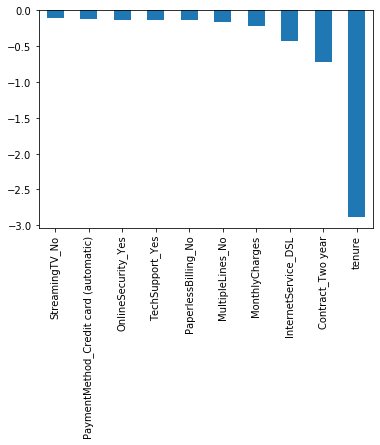

In [173]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.

In [174]:
from sklearn.ensemble import RandomForestClassifier


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rf = RandomForestClassifier(n_estimators=300, oob_score=True, n_jobs = -1, random_state = 50, max_features = 'auto', 
      max_leaf_nodes = 30)
rf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [183]:
y_pred = rf.predict(X_test)

In [185]:
print(metrics.accuracy_score(y_test, y_pred))

0.8090047393364929


In [189]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1450  130]
 [ 273  257]]


In [191]:
print(metrics.f1_score(y_pred, y_test))

0.5605234460196292


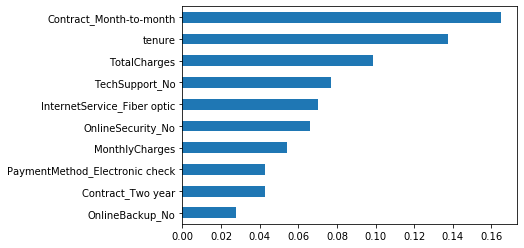

In [194]:
importances = rf.feature_importances_
weights = pd.Series(importances, index=X.columns.values)
weights.sort_values()[-10:].plot(kind='barh')

From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.

The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

In [195]:
#  SVM

In [196]:
from sklearn.svm import SVC

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 99)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [200]:
print(metrics.accuracy_score(y_test, svm_pred))
print(metrics.confusion_matrix(y_test, svm_pred))

0.820184790334044
[[953  89]
 [164 201]]


Wth SVM I was able to increase the accuracy to upto 82%. However, we need to take a deeper look at the true positive and true negative rates, including the Area Under the Curve (AUC) for a better prediction.

In [201]:
# ADA boost

In [202]:
from sklearn.ensemble import AdaBoostClassifier

In [203]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)
ada_predict = model_ada.predict(X_test)

In [205]:
print(metrics.accuracy_score(y_test, ada_predict))

0.8159203980099502
